<h1 align="center">Retail Sales Data Analysis</h1> <h2 align="center">Parker Glas</h2>


### Dataset used is a synthetic, secondary dataset from Kaggle.com -> https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

### Objective: 
##### Examine customer and sales data to reveal insights into purchasing behavior and other business-related factors.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [6]:
data = pd.read_csv("retail-sales-dataset.csv")
df = data.copy()
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Check For NA Values

In [8]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

##### No NA values

### Check Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

### Convert Date to datetime Type

In [14]:
pd.to_datetime(df["Date"], format="%Y-%m-%d").head()

0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]

In [15]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


The dataset seems to be in good order regarding cleaning and preprocessing, and I don't think it needs any more work before analysis. I think checking for NAs and converting the Date column to the Pandas datetime type is sufficient in this case.

### Quick High-Level Overview

In [18]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


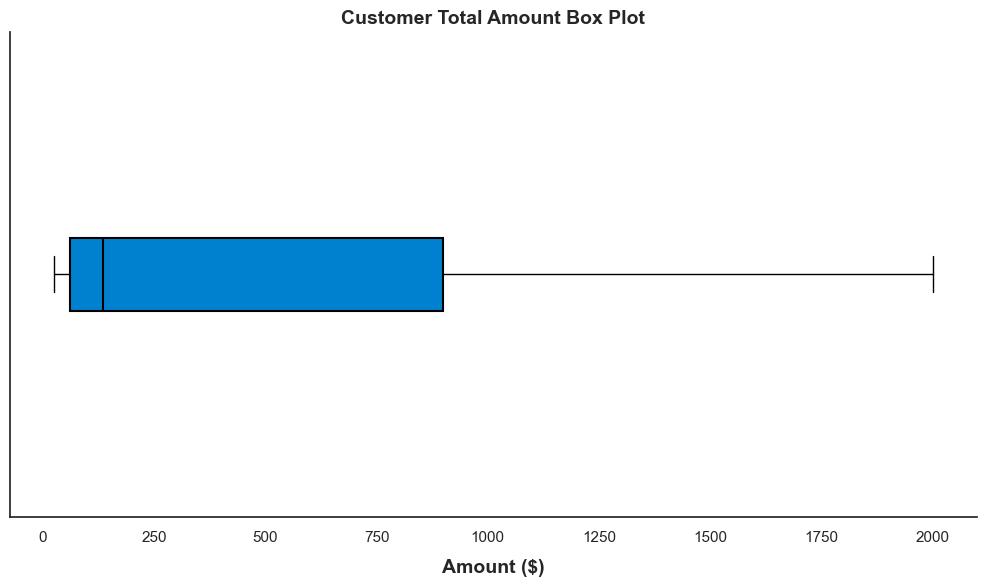

In [19]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.boxplot(
    df["Total Amount"], 
    vert=False, 
    patch_artist=True,
    boxprops={
        "facecolor": "#0081cf",
        "linewidth": 1.5
    },
    medianprops={
        "color": "black",
        "linewidth": 1.5
    }
)
plt.xlabel("Amount ($)", fontsize=14, weight="bold", labelpad=10)
plt.yticks([])
plt.title("Customer Total Amount Box Plot", fontsize=14, weight="bold")
sns.despine()
plt.tight_layout(pad=1)
plt.show()

In [20]:
df["Gender"].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

#### Practically even gender split.

In [22]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

This helps a lot with determining the environment of the store. It appears to be a store solely focused on the clothing, electronics, and beauty industries. Having all sales in these categories makes for a fascinating blend of products and potential customers.

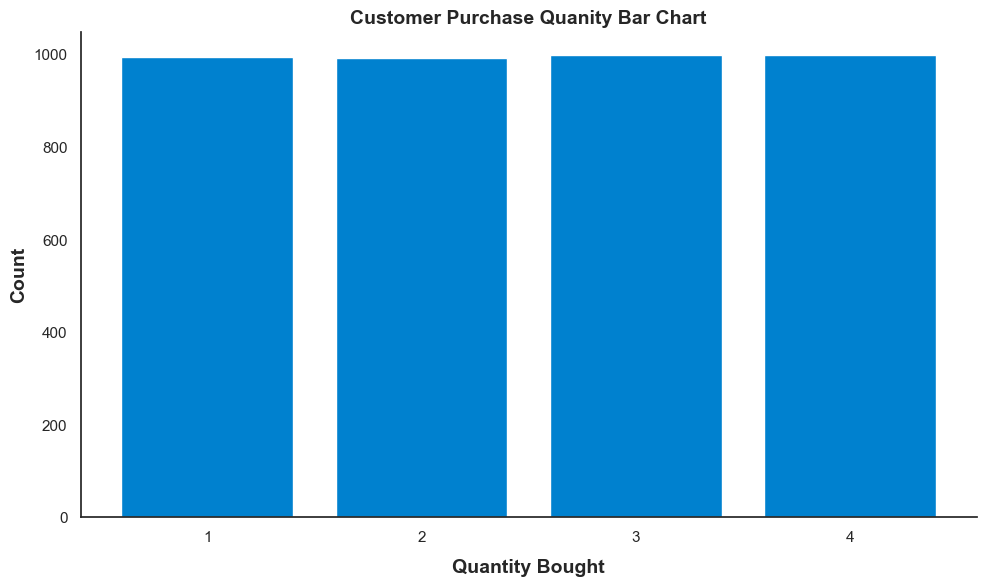

In [24]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.bar(df["Quantity"], df["Quantity"].index, color="#0081cf")
plt.xticks(range(1, 5))
plt.xlabel("Quantity Bought", fontsize=14, weight="bold", labelpad=10)
plt.ylabel("Count", fontsize=14, weight="bold")
plt.title("Customer Purchase Quanity Bar Chart", fontsize=14, weight="bold")
sns.despine()
plt.tight_layout(pad=1)
plt.show()

## Exploratory Data Analysis 

#### Gender Analysis

In [27]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [28]:
total_spend_gender = df.groupby("Gender")["Total Amount"].sum()
total_spend_gender

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

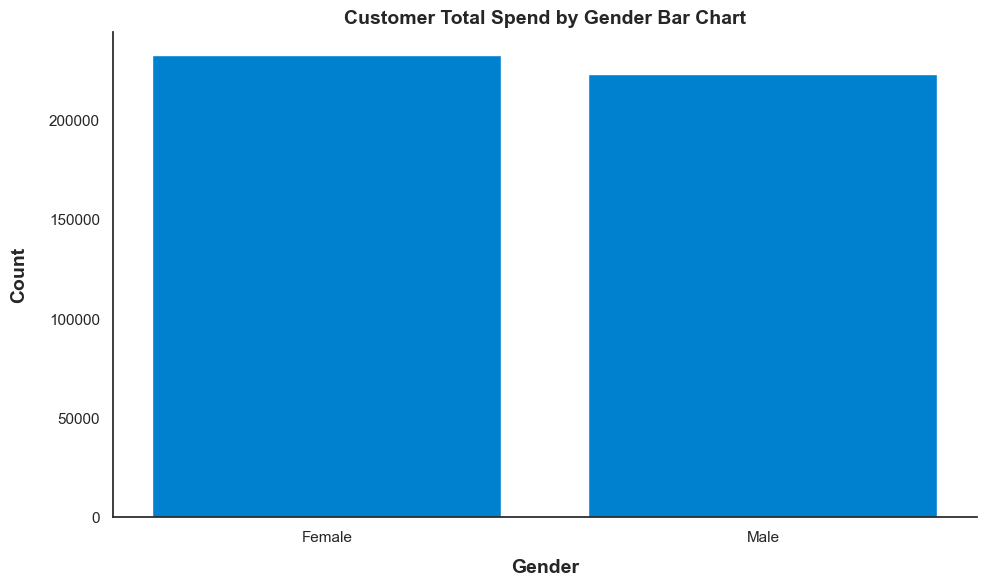

In [29]:
def bar_chart_func(s, label):
    sns.set()
    sns.set_style("white")
    plt.figure(figsize=(10, 6))
    plt.bar(s.index, s, color="#0081cf")
    plt.xlabel(label, fontsize=14, weight="bold", labelpad=10)
    plt.ylabel("Count", fontsize=14, weight="bold", labelpad=15)
    plt.title(f"Customer Total Spend by {label} Bar Chart", fontsize=14, weight="bold")
    plt.tight_layout(pad=1)
    sns.despine()
    plt.show()
bar_chart_func(total_spend_gender, "Gender")

In [30]:
df.groupby("Gender")["Age"].mean()

Gender
Female    41.356863
Male      41.428571
Name: Age, dtype: float64

In [31]:
df.groupby("Gender")["Product Category"].value_counts()

Gender  Product Category
Female  Clothing            174
        Electronics         170
        Beauty              166
Male    Clothing            177
        Electronics         172
        Beauty              141
Name: count, dtype: int64

In [32]:
df.groupby("Gender")["Quantity"].mean()

Gender
Female    2.545098
Male      2.481633
Name: Quantity, dtype: float64

### Category Analysis

In [34]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [35]:
total_spend_category = df.groupby("Product Category")["Total Amount"].sum()
total_spend_category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

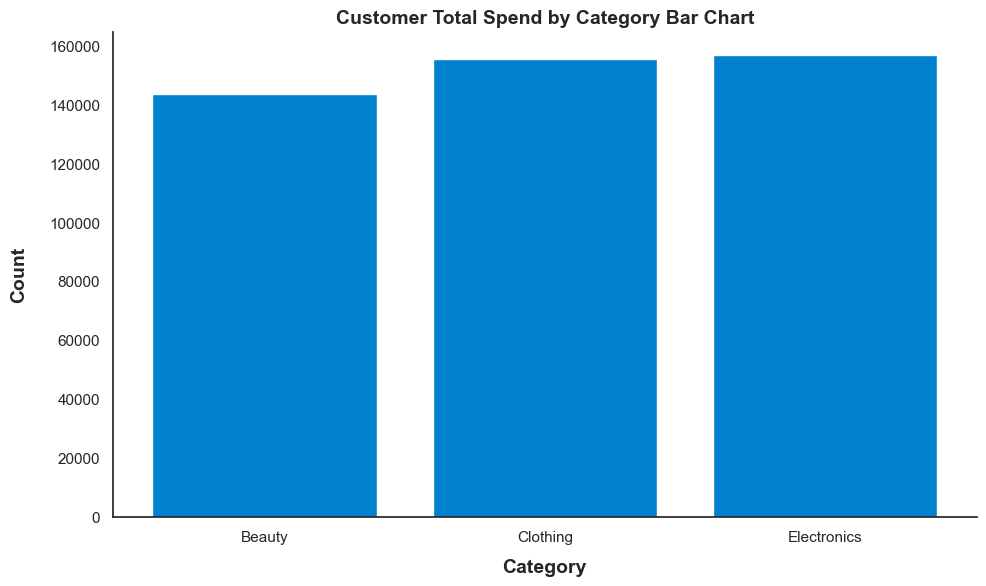

In [36]:
bar_chart_func(total_spend_category, "Category")

In [37]:
print(df.groupby("Product Category")["Price per Unit"].mean())
print(df.groupby("Product Category")["Price per Unit"].min())
print(df.groupby("Product Category")["Price per Unit"].max())

Product Category
Beauty         184.055375
Clothing       174.287749
Electronics    181.900585
Name: Price per Unit, dtype: float64
Product Category
Beauty         25
Clothing       25
Electronics    25
Name: Price per Unit, dtype: int64
Product Category
Beauty         500
Clothing       500
Electronics    500
Name: Price per Unit, dtype: int64


In [38]:
df.groupby("Product Category")["Age"].mean()

Product Category
Beauty         40.371336
Clothing       41.948718
Electronics    41.736842
Name: Age, dtype: float64

In [39]:
df.groupby("Product Category")["Quantity"].mean()

Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64

In [40]:
df.groupby(["Product Category", "Gender"])["Total Amount"].sum()

Product Category  Gender
Beauty            Female    74830
                  Male      68685
Clothing          Female    81275
                  Male      74305
Electronics       Female    76735
                  Male      80170
Name: Total Amount, dtype: int64

Grouping by category made it clear that electronics and clothing have a noticeable amount of more total spending than beauty. It's also become more evident that females spend more on beauty and clothing, while males spend more on electronics at this store. Another interesting occurrence I noticed was that beauty has the highest mean price per unit while having the lowest total spend. Beauty has the most expensive products but far less volume than clothing and electronics.

### Age Analysis

In [43]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

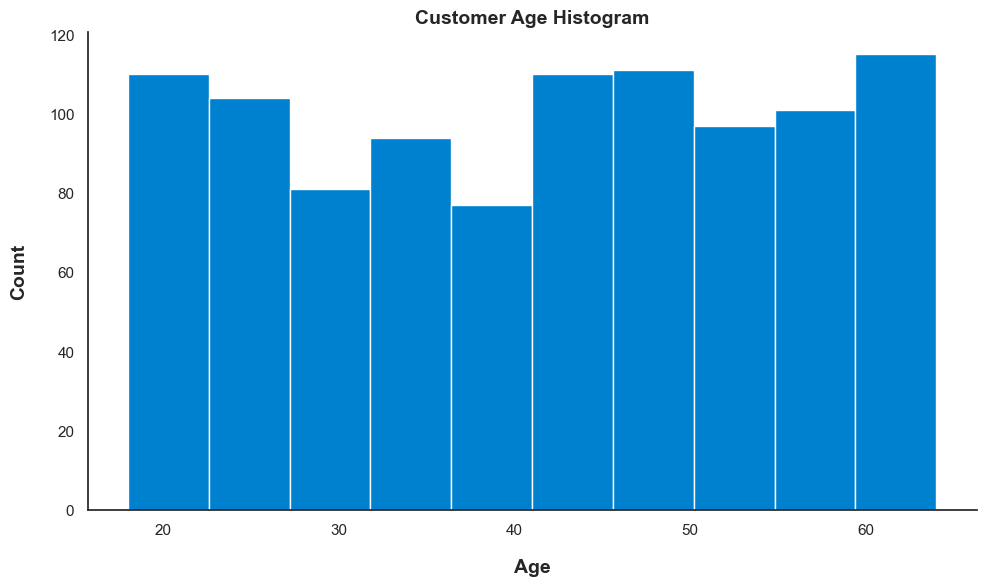

In [44]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.hist(df["Age"], color="#0081cf")
plt.xlabel("Age", fontsize=14, weight="bold", labelpad=15)
plt.ylabel("Count", fontsize=14, weight="bold", labelpad=15)
plt.title("Customer Age Histogram", fontsize=14, weight="bold")
sns.despine()
plt.tight_layout(pad=1)
plt.show()

#### Age Stats Function

In [46]:
def print_age_stats(age1, age2):
    age_range = df[(df["Age"] >= age1) & (df["Age"] <= age2)]
    print(f"Age group {age1}-{age2}.")
    print(age_range["Total Amount"].sum())
    print(age_range["Total Amount"].mean().round(2))
    print(age_range["Transaction ID"].nunique())
    age_series = age_range.groupby("Product Category")["Total Amount"].sum()
    print(age_range.groupby("Product Category")["Total Amount"].sum())
    print(age_range["Gender"].value_counts())

    sorted_age_series = age_series.sort_values()
    sns.set()
    sns.set_style("white")
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_age_series.index, sorted_age_series, color="#0081cf")
    plt.xlabel("Category", fontsize=14, weight="bold", labelpad=10)
    plt.ylabel("Total Spend ($)", fontsize=14, weight="bold")
    plt.title(f"Age Group {age1} - {age2} Spending Bar Chart", fontsize=14, weight="bold")
    sns.despine()
    plt.tight_layout(pad=1)
    plt.show()

#### Ages 18-22

Age group 18-22.
61015
554.68
110
Product Category
Beauty         25380
Clothing       15690
Electronics    19945
Name: Total Amount, dtype: int64
Gender
Female    57
Male      53
Name: count, dtype: int64


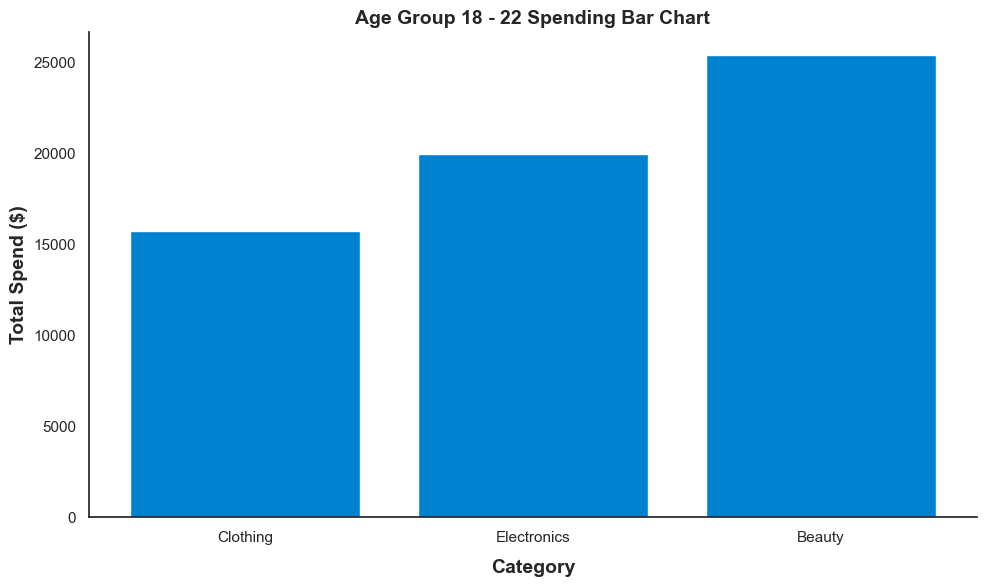

In [48]:
print_age_stats(18, 22)

#### Ages 23-27

Age group 23-27.
46900
450.96
104
Product Category
Beauty         12370
Clothing       23760
Electronics    10770
Name: Total Amount, dtype: int64
Gender
Female    52
Male      52
Name: count, dtype: int64


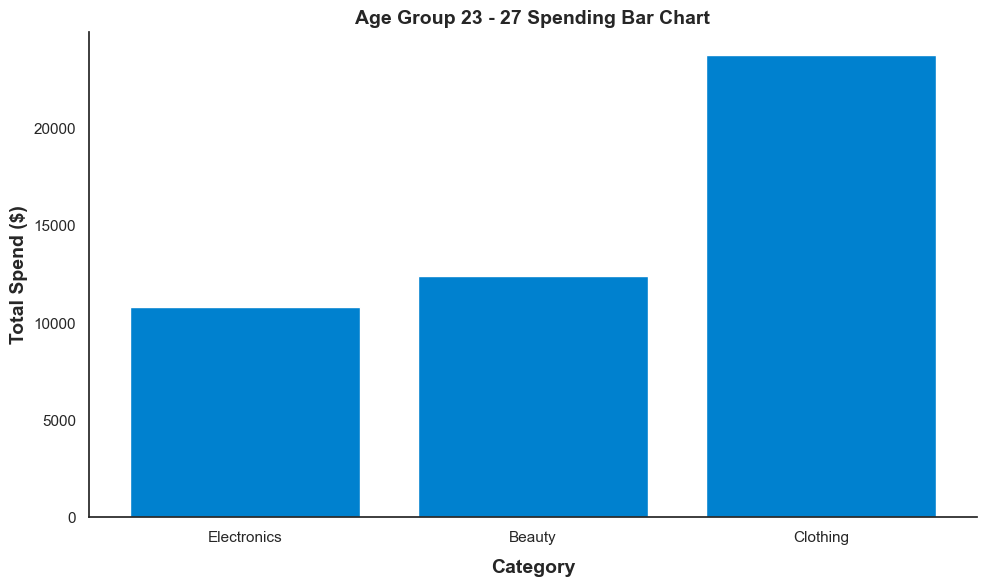

In [50]:
print_age_stats(23, 27)

#### Ages 28-32

Age group 28-32.
40800
408.0
100
Product Category
Beauty         10040
Clothing       17860
Electronics    12900
Name: Total Amount, dtype: int64
Gender
Male      55
Female    45
Name: count, dtype: int64


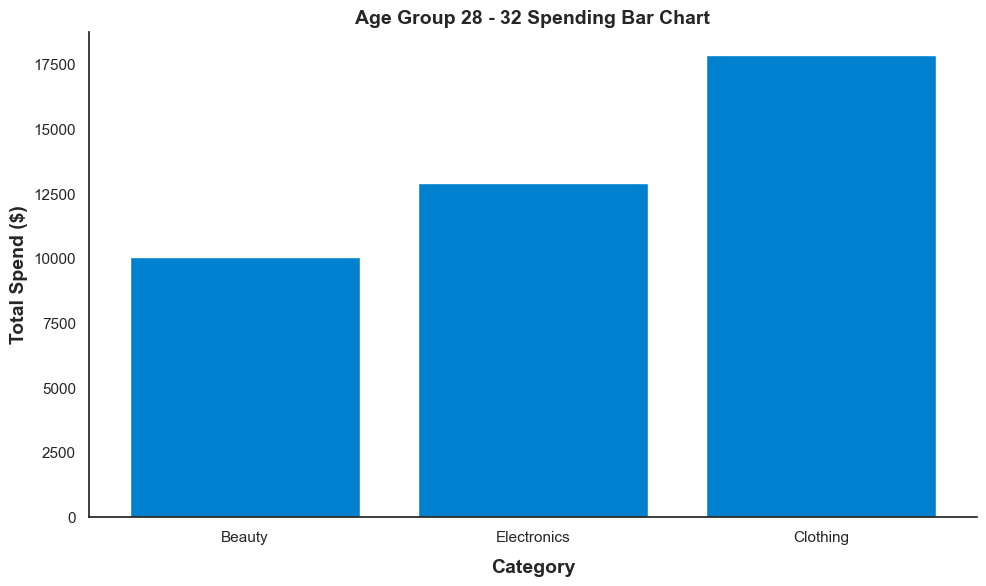

In [52]:
print_age_stats(28, 32)

#### Ages 33-37

Age group 33-37.
55070
605.16
91
Product Category
Beauty         19675
Clothing       17855
Electronics    17540
Name: Total Amount, dtype: int64
Gender
Female    50
Male      41
Name: count, dtype: int64


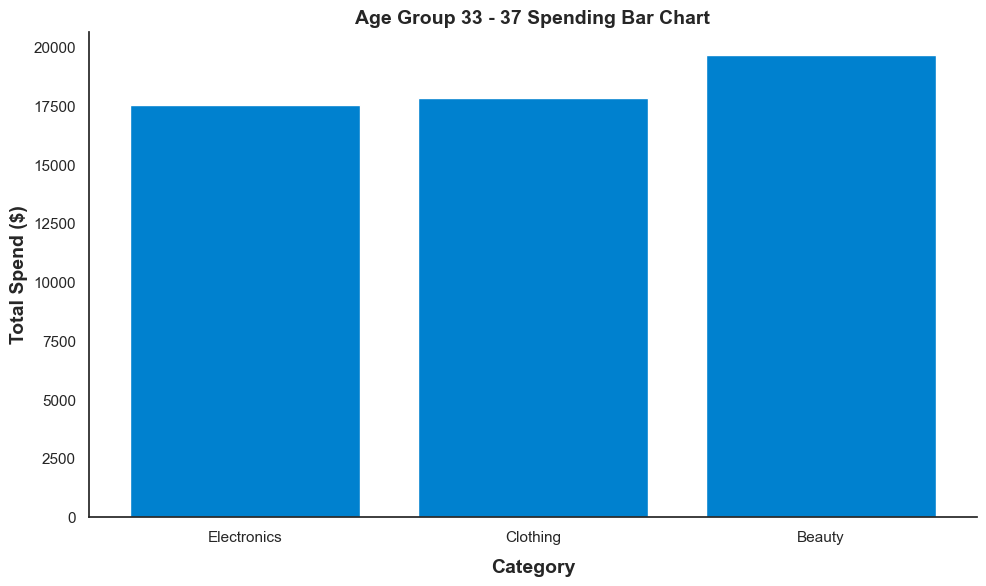

In [54]:
print_age_stats(33, 37)

#### Ages 38-42

Age group 38-42.
39260
363.52
108
Product Category
Beauty         16780
Clothing        8145
Electronics    14335
Name: Total Amount, dtype: int64
Gender
Female    55
Male      53
Name: count, dtype: int64


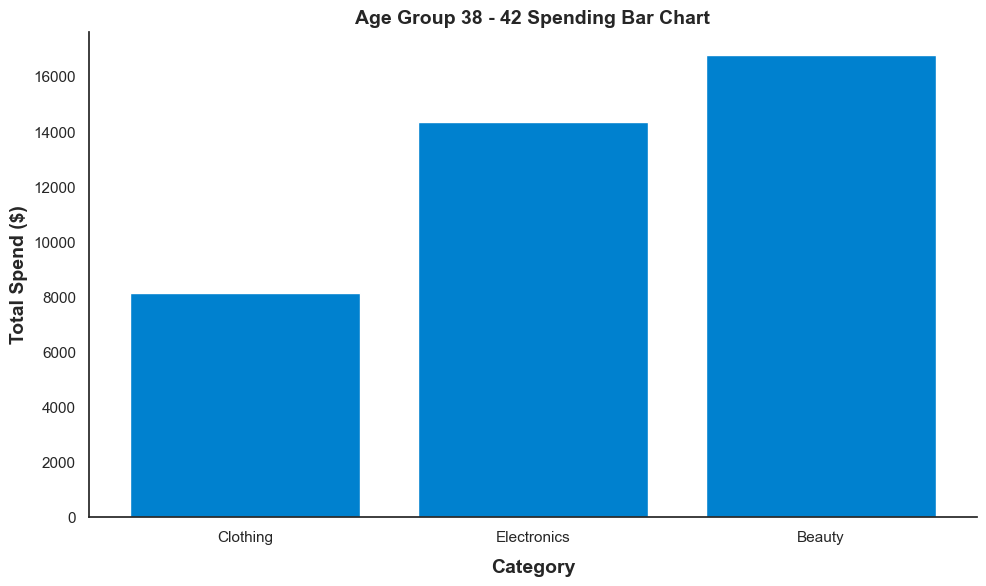

In [56]:
print_age_stats(38, 42)

#### Ages 43-47

Age group 43-47.
57450
503.95
114
Product Category
Beauty         21190
Clothing       18120
Electronics    18140
Name: Total Amount, dtype: int64
Gender
Female    67
Male      47
Name: count, dtype: int64


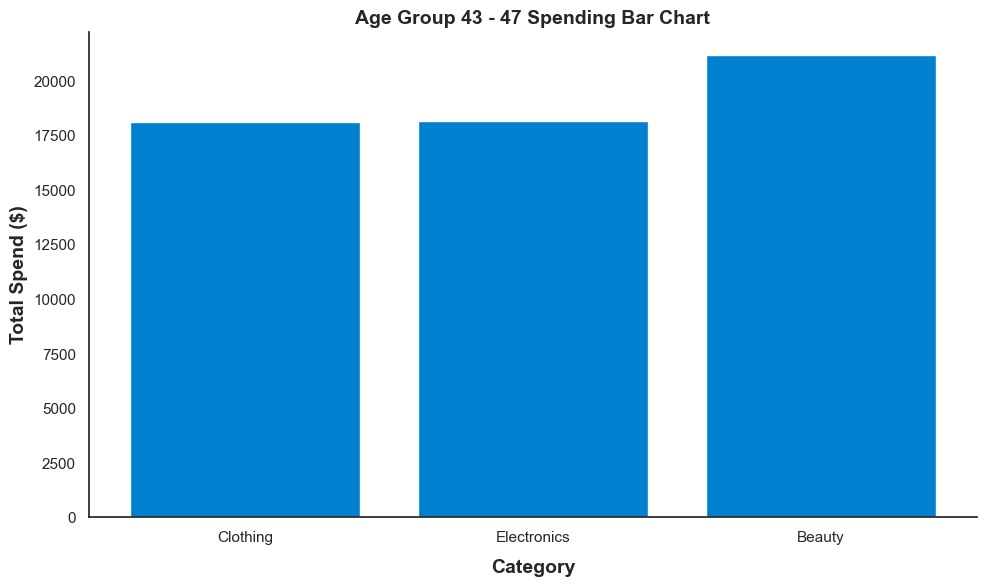

In [58]:
print_age_stats(43, 47)

#### Ages 48-52

Age group 43-47.
57450
503.95
114
Product Category
Beauty         21190
Clothing       18120
Electronics    18140
Name: Total Amount, dtype: int64
Gender
Female    67
Male      47
Name: count, dtype: int64


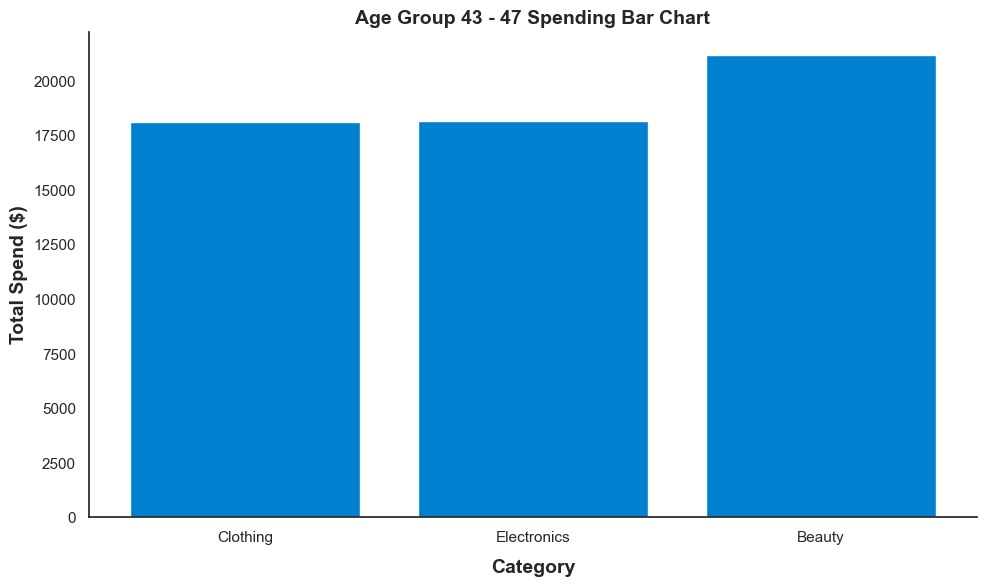

In [60]:
print_age_stats(43, 47)

#### Ages 53-57

Age group 53-57.
48525
421.96
115
Product Category
Beauty         12950
Clothing       18090
Electronics    17485
Name: Total Amount, dtype: int64
Gender
Male      59
Female    56
Name: count, dtype: int64


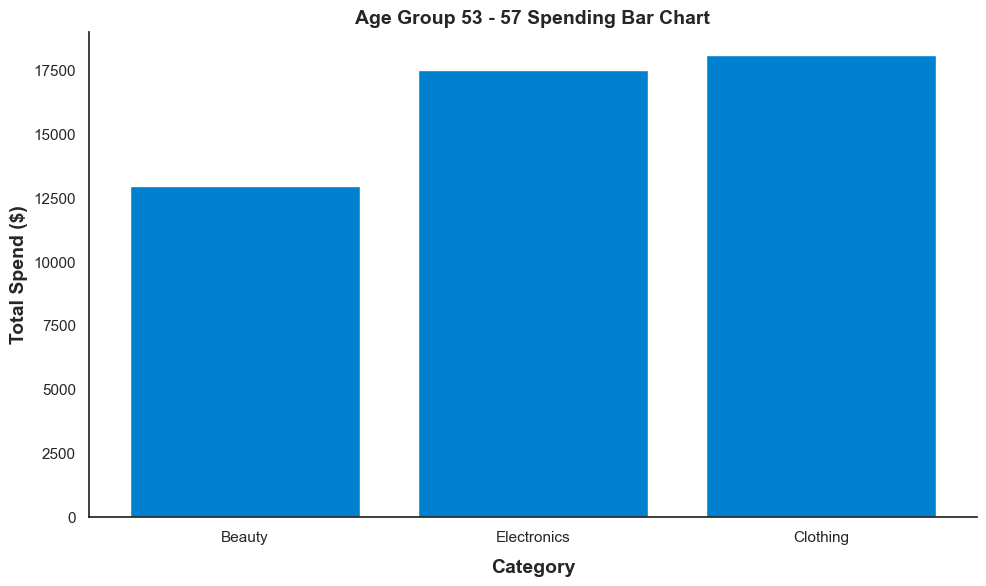

In [62]:
print_age_stats(53, 57)

#### Ages 58-64

Age group 58-64.
61680
422.47
146
Product Category
Beauty         12110
Clothing       21525
Electronics    28045
Name: Total Amount, dtype: int64
Gender
Male      74
Female    72
Name: count, dtype: int64


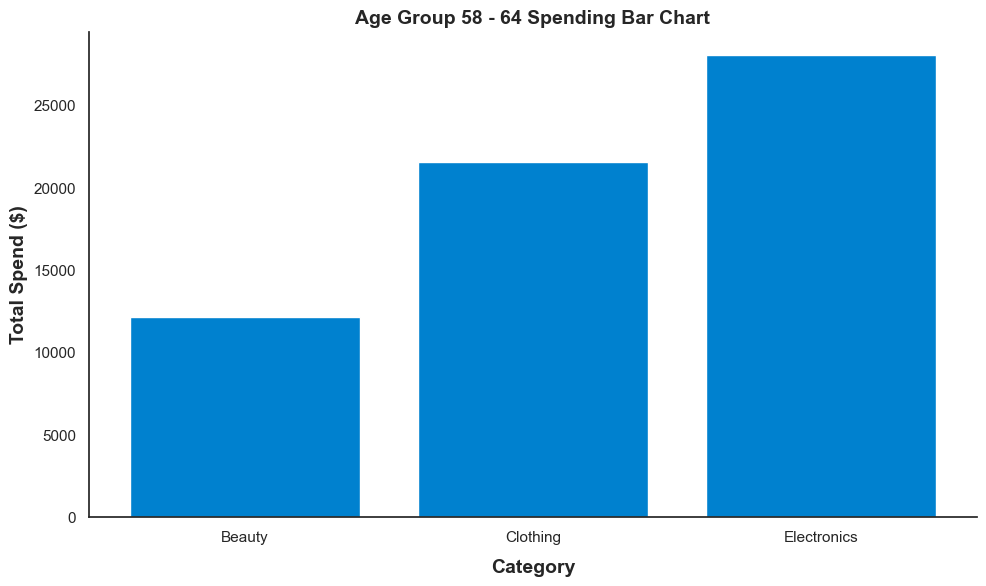

In [64]:
print_age_stats(58, 64)

I believe splitting the ages into groups and utilizing these groups has led to the most meaningful findings so far. Based on the findings above, the store could use this information to tailor different parts of their store accordingly. The youngest age group, for instance, is one of the biggest spending groups and does a large part of it on beauty. There's also a disparity in the gender count for the different age groups. This insight could also be useful in tailoring ads to specific a gender in ads. The data also shows opportunities for the store to try and reach new customer bases currently not spending as much as others. The histogram also gives us a clear picture of how many customers from each age group have shopped at the store.

### Date Analysis

In [67]:
df["Date"].head()

0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]

In [68]:
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Total Amount"].sum()
monthly_sales

Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64

In [69]:
monthly_sales.index = monthly_sales.index.to_timestamp()

January 2024 only contains one day of data, so it should be dropped from the graph.

In [71]:
monthly_sales_without_last = monthly_sales.iloc[:-1]
monthly_sales_without_last

Month
2023-01-01    35450
2023-02-01    44060
2023-03-01    28990
2023-04-01    33870
2023-05-01    53150
2023-06-01    36715
2023-07-01    35465
2023-08-01    36960
2023-09-01    23620
2023-10-01    46580
2023-11-01    34920
2023-12-01    44690
Freq: MS, Name: Total Amount, dtype: int64

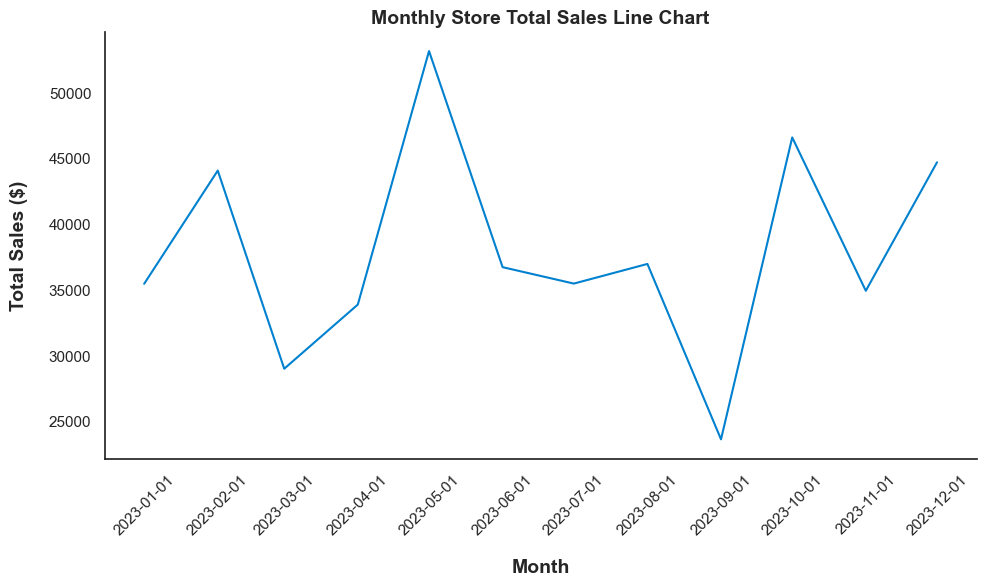

In [72]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_without_last.index, monthly_sales_without_last, color="#0081cf")
plt.xlabel("Month", fontsize=14, weight="bold", labelpad=15)
plt.xticks(monthly_sales_without_last.index, rotation=45)
plt.ylabel("Total Sales ($)", fontsize=14, weight="bold", labelpad=15)
plt.title("Monthly Store Total Sales Line Chart", fontsize=14, weight="bold")
sns.despine()
plt.tight_layout(pad=1)
plt.show()

For the different date ranges, spending spikes around the holiday season which isn't surprising for a retail store like this one. The peculiar insight that I found was that there was a significant spike in May. It's the biggest total spend of all the other intervals, and this is undoubtedly an interesting occurrence that the store could use to its advantage. Did they do a sale in May or launch many new products, and if so, could they replicate it to have revenue like that more often? I think this is an excellent opportunity for the store to look back and see if they did anything out of the ordinary and try to replicate it more often.

## Conclusion: My Insights After Analysis

### Insight #1: May Sales Spike
Perhaps the most significant insight I discovered during my analysis of the store data was the notable spike in sales during May. While it's important to consider that this could be a fluke or an outlier, I suspect there may be significant factors at play that the store could leverage. Did the store implement any discounts, run promotions, or introduce new products that month? If so, this information could be invaluable. By identifying and replicating those successful strategies, the store has the potential to boost sales revenue more consistently in the future.

### Insight #2: Age Distribution
The age histogram shows a relatively uniform distribution, although there are some variations in certain age ranges. Specifically, there is a decline in the number of customers in the 25-40 age group, while the other age groups remain fairly stable. Additionally, after categorizing the data by different age groups, trends emerge in the purchasing behaviors of specific age ranges. This information could be extremely beneficial for the store, particularly for the marketing team, as it helps them understand which age groups are more inclined to shop in certain categories.

### Insight #3: Narrow Product Focus
Without more information about the store and its operations, it's difficult to determine the best strategies for generating more revenue moving forward. However, the store appears to attract a balanced and diverse group of customers, and currently, they only have three categories of products. Expanding this range could help the store keep existing customers satisfied, encourage them to visit more often, and even attract new customers. Depending on the business model, this might not be a suitable option, but it's worth exploring if the business is positioned for growth.

### Insight #4: Gender Shopping Preferences
 When analyzing gender, I noticed a few tendencies between males and females. First, females tended to spend more on clothing and shopping, while males spent more on electronics. Additionally, there were noticeable differences in gender disparities among store customers of various age groups. I believe these gender trends can be valuable for the store as they continue to help them better understand their customer base and what specific customers typically purchase.